In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
# from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [69]:
df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [70]:
df.shape

(2416, 7)

In [71]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


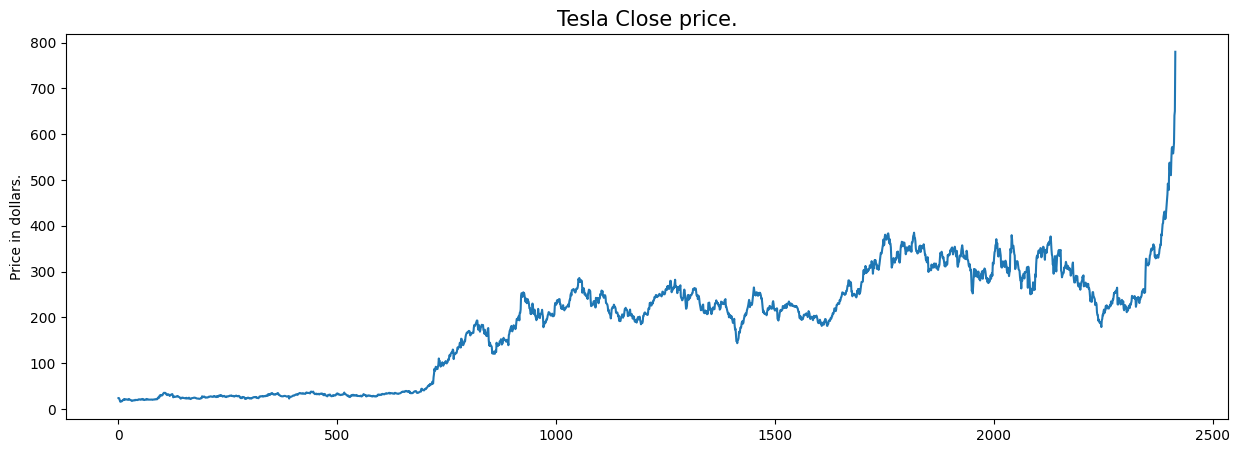

In [73]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [74]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [75]:
df[df['Close'] == df['Adj Close']].shape

(2416, 7)

In [76]:
df = df.drop(['Adj Close'], axis=1)

In [77]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

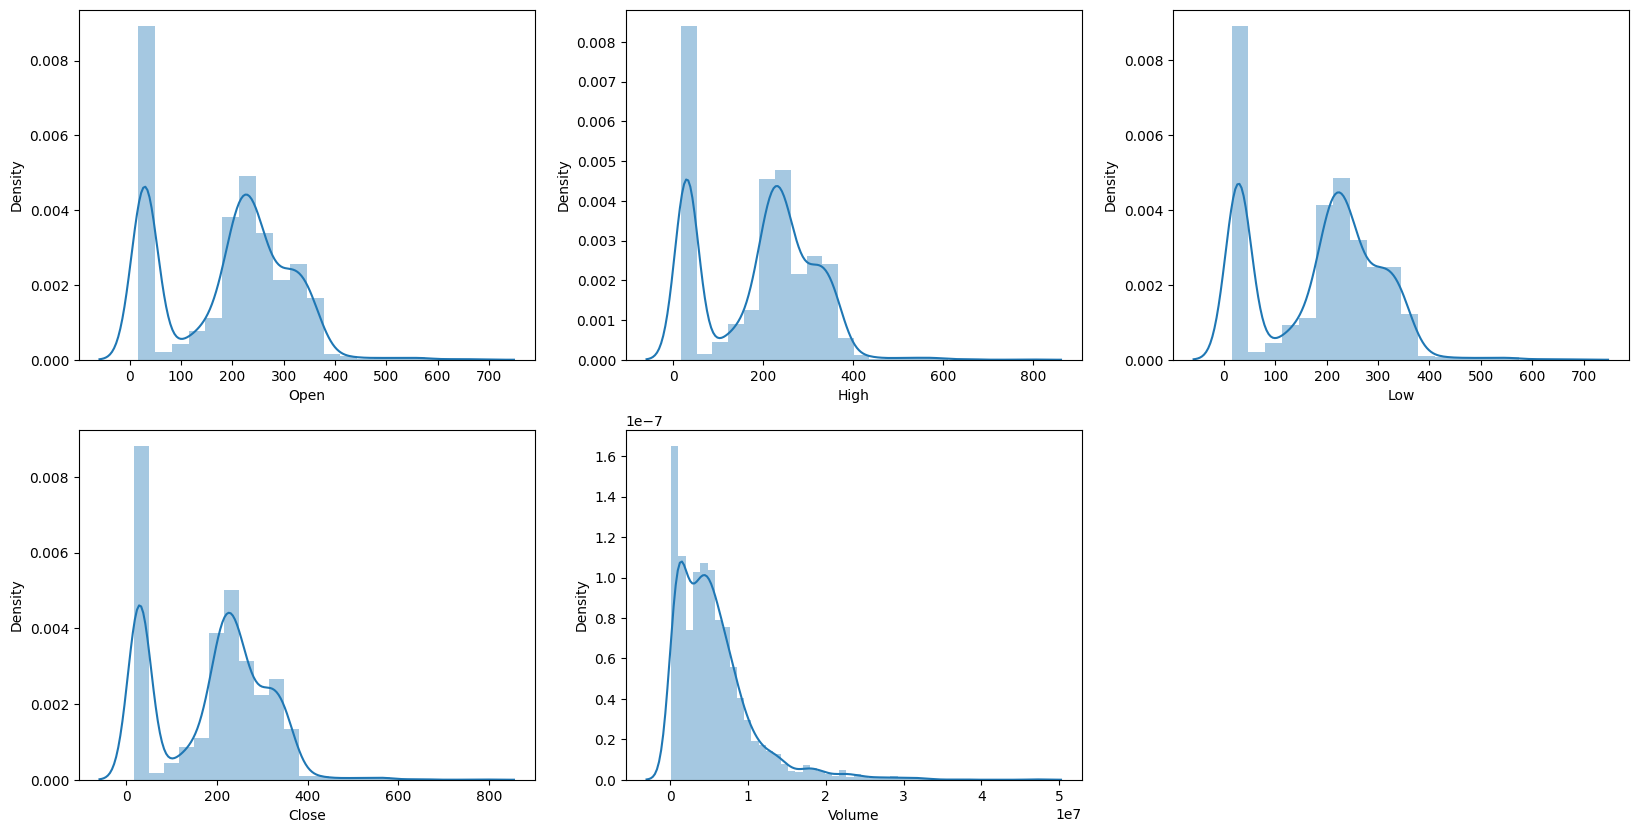

In [78]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col])
plt.show()

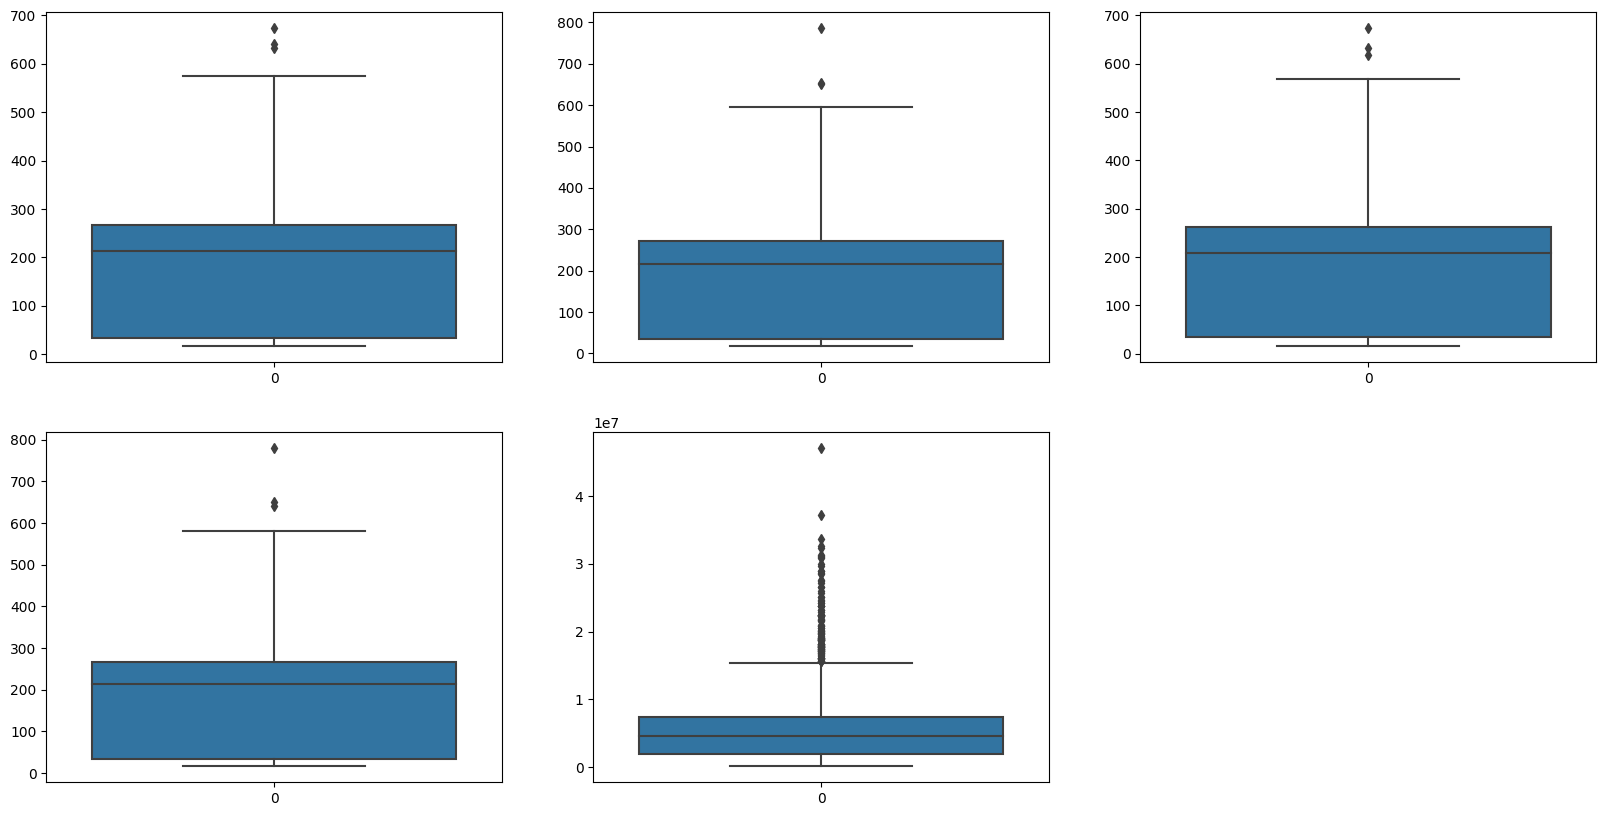

In [79]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()

In [80]:
# Check column names
print(df.columns)

# Check data type of 'Date' column
print(df['Date'].dtype)

# Check the length of the DataFrame
print(len(df))

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
object
2416


In [81]:
print(df['Date'].head())


0    2010-06-29
1    2010-06-30
2    2010-07-01
3    2010-07-02
4    2010-07-06
Name: Date, dtype: object


In [82]:
# Split the 'Date' column based on the '-' separator
splitted = df['Date'].str.split('-', expand=True)

# Create separate 'year', 'month', and 'day' columns
df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

In [83]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,2010,6,29,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,2010,6,30,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,2010,7,1,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2010,7,2,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,2010,7,6,0


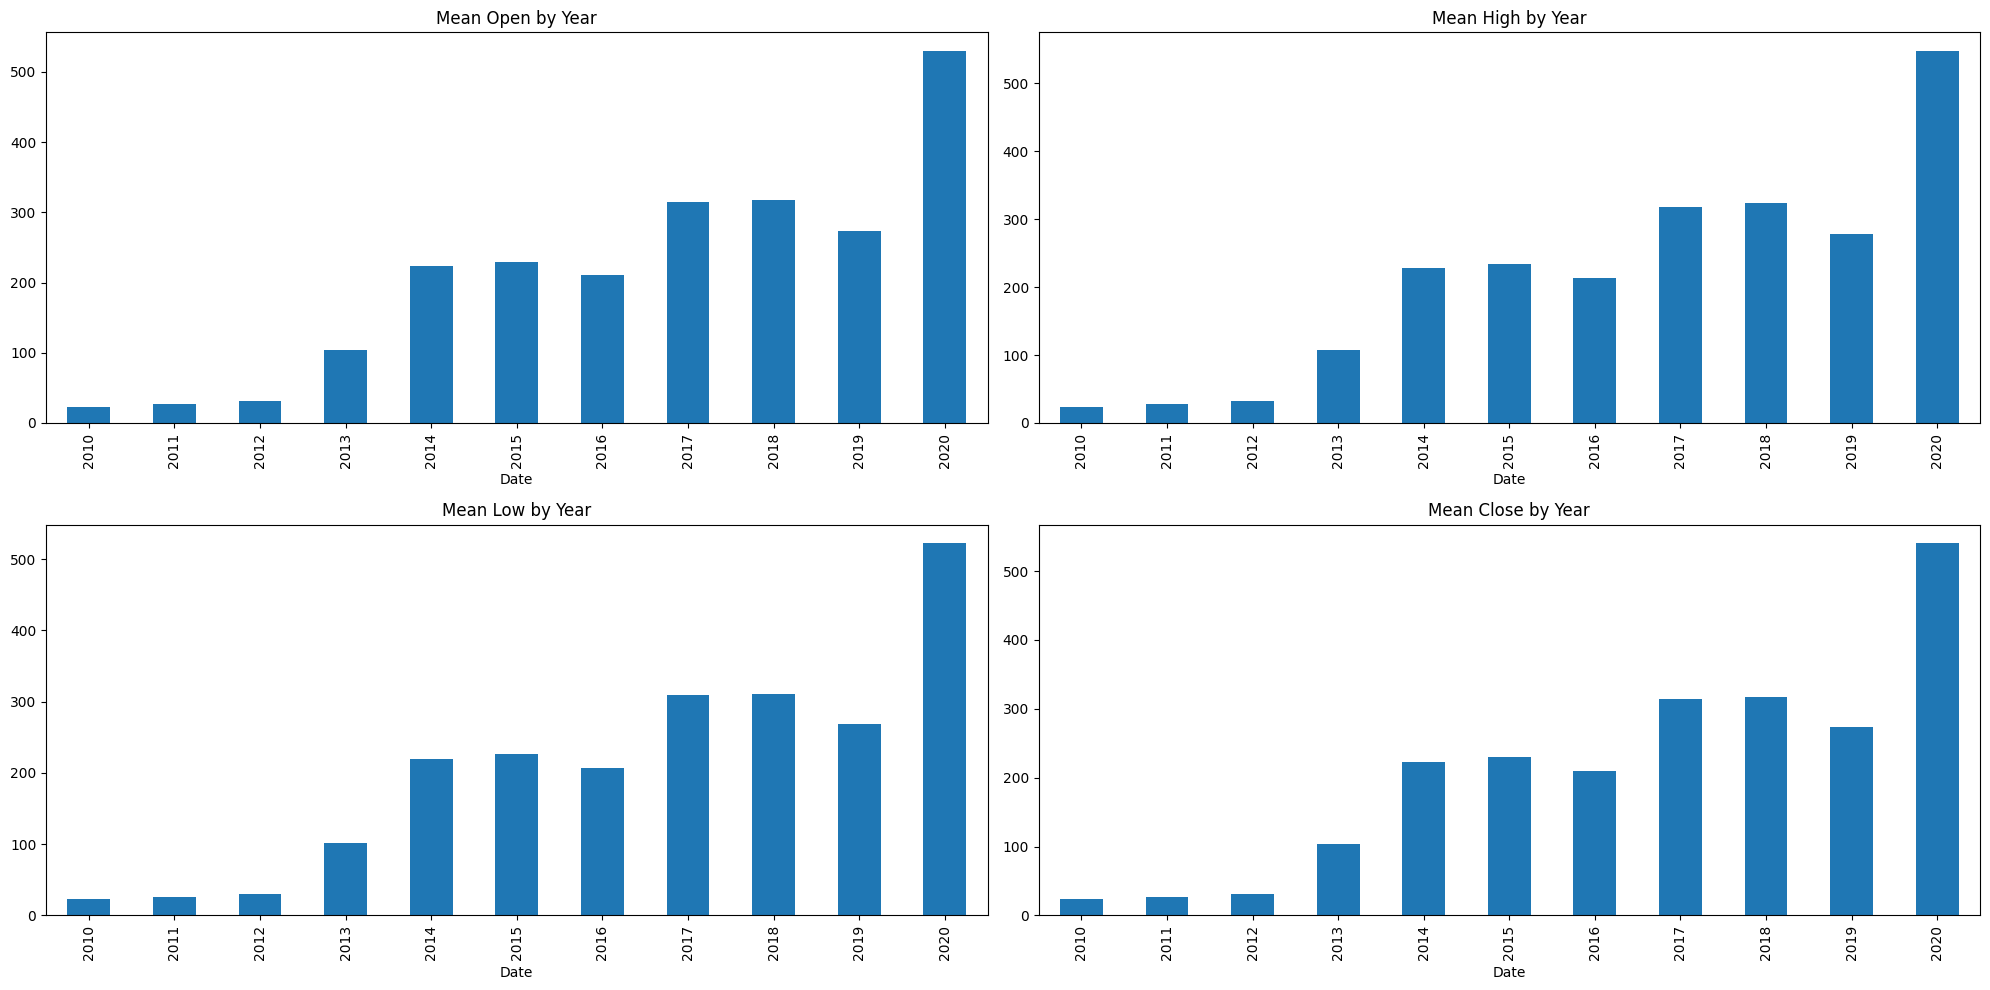

In [84]:
# Convert the 'Date' column to datetime to ensure it's recognized as dates
df['Date'] = pd.to_datetime(df['Date'])

# Group by 'year' and calculate the mean for each year
data_grouped = df.groupby(df['Date'].dt.year).mean()

# Create a bar plot for each of the 'Open', 'High', 'Low', 'Close' columns
plt.subplots(figsize=(20, 10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    data_grouped[col].plot.bar(title=f'Mean {col} by Year')
plt.tight_layout()
plt.show()


In [85]:
df.groupby('is_quarter_end').mean()

,Date,Open,High,Low,Close,Volume,year,month,day
is_quarter_end,,,,,,,,,
0,2015-04-15 12:01:46.930693120,185.875081,189.254226,182.449499,186.085081,5.767062e+06,2014.816213,6.173886,15.710396
1,2015-04-15 09:25:12.000000000,187.071200,190.232700,183.860262,187.047163,5.180154e+06,2014.697500,7.597500,15.825000


In [86]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

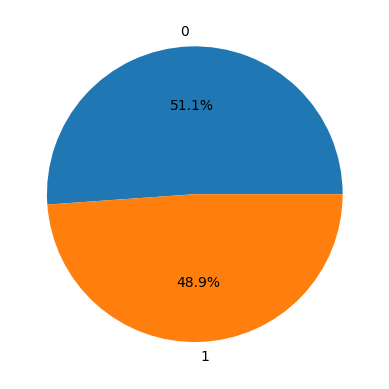

In [87]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

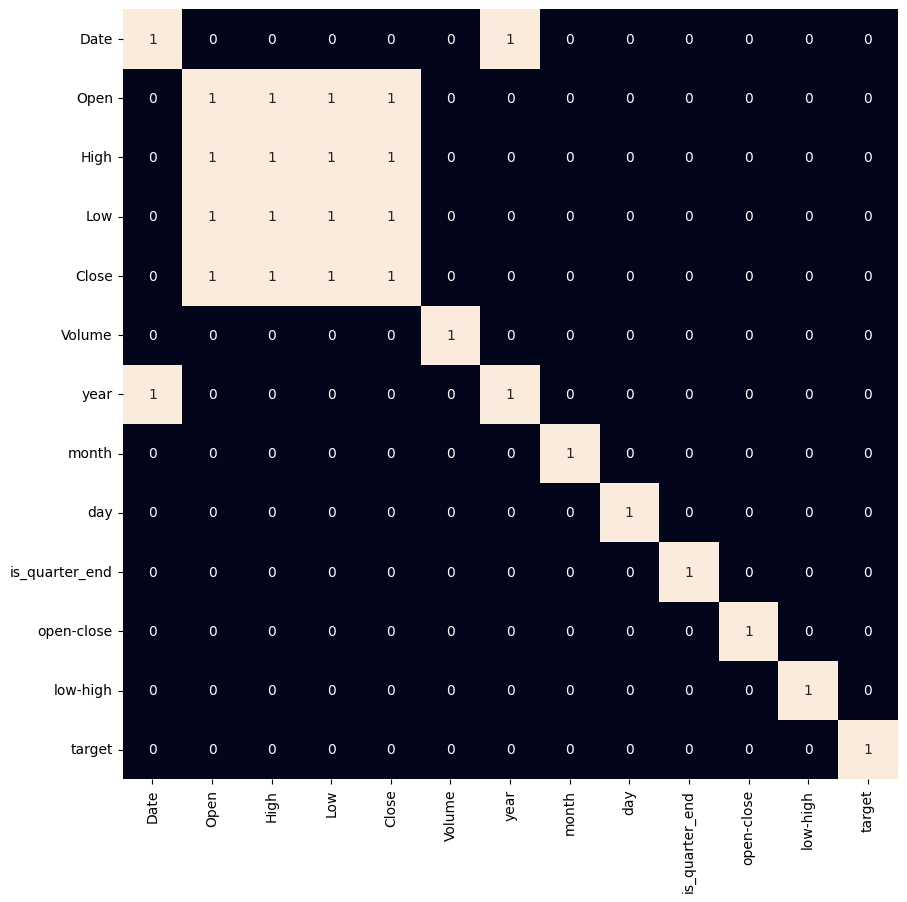

In [88]:
plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [89]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2174, 3) (242, 3)


In [90]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5228802330060918
Validation Accuracy :  0.4923371647509579

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.529452579619587
Validation Accuracy :  0.4625068418171866

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accurac

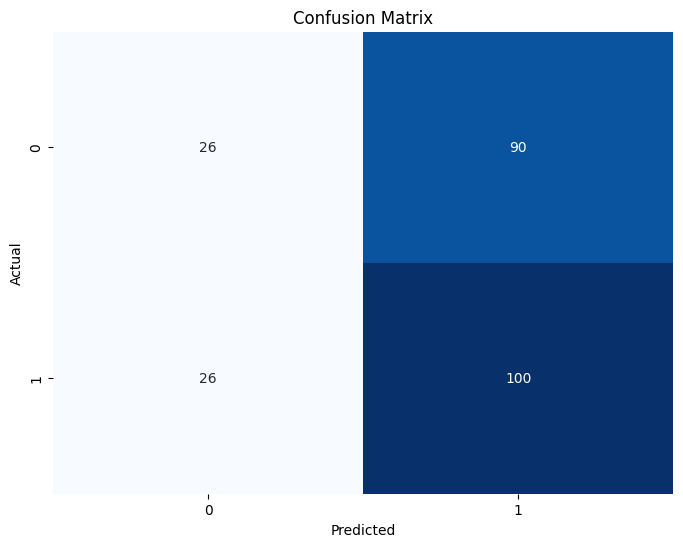

In [91]:
from sklearn.metrics import confusion_matrix
# Assuming 'models[0]' is your trained machine learning model and 'X_valid' and 'Y_valid' are your validation data
y_pred = models[0].predict(X_valid)

# Calculate the confusion matrix
cm = confusion_matrix(Y_valid, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()